In [1]:
from scipy import stats
import random
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(10)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000) # Generate 15000 poisson rvs with mu equal to 48
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000) # Generate 10000 poisson rvs with mu equal to 28

population_ages = np.concatenate((population_ages1, population_ages2))
[round(x.mean(), 3) for x in (population_ages1, population_ages2, population_ages)]

[53.005, 27.998, 43.002]

In [3]:
sample_ages = np.random.choice(a=population_ages, size=500, replace=True)   # sampling with replacement, default

In [4]:
random.seed(10)

population_races = ['white']*100000 + ['black']*50000 + ['hispanic']*50000 + ['asian']*25000 + ['other']*25000
print(len(population_races))
print([population_races[x] for x in [0,100000, 150000, 200000, 225000]])

250000
['white', 'black', 'hispanic', 'asian', 'other']


In [5]:
demo_sample = random.sample(population=population_races, k=1000)    # without replacement
set(demo_sample)

for race in set(demo_sample):
    print(race + "'s proportion estimate : " + str(demo_sample.count(race)/1000)) 

black's proportion estimate : 0.231
other's proportion estimate : 0.099
asian's proportion estimate : 0.099
white's proportion estimate : 0.379
hispanic's proportion estimate : 0.192


#### Sampling Distributions & Central Limit Theorem

-0.12008483603917186


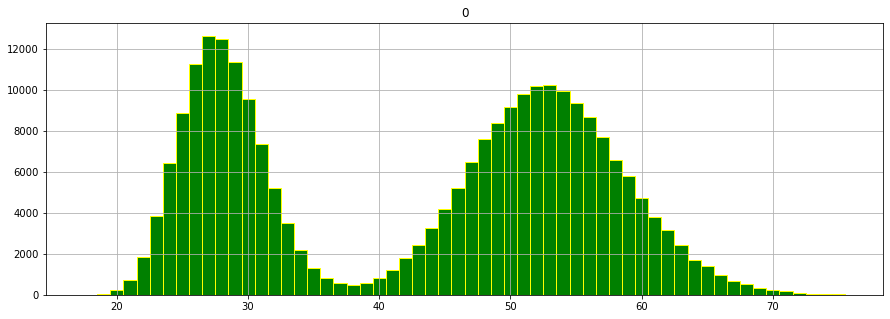

In [6]:
print(stats.skew(population_ages))

pd.DataFrame(data=population_ages).hist(bins=58, range=(17.5, 75.5), color='g', edgecolor='yellow', figsize=(15, 5))
plt.show()

##### The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this populaton have roughly the shape and skew:

-0.13782917026500982


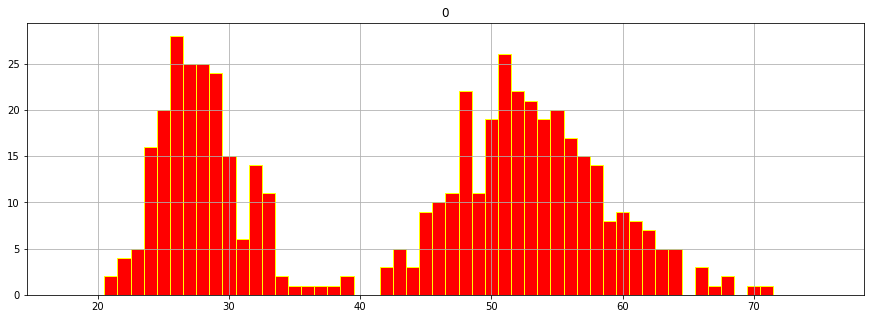

In [7]:
print(stats.skew(sample_ages))

pd.DataFrame(data=sample_ages).hist(bins=58, range=(17.5, 75.5), color='red', edgecolor='yellow', figsize=(15,5))
plt.show()

##### The sample has roughly the same shape as the underlying population. This suggests that we can't apply technique that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.<br><br>The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. As a result we can treat the sample mean as if it were drawn from normal distribution.<br><br>To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

In [8]:
np.random.seed(10)
point_estimates = []

for x in range(200):
    sample = np.random.choice(a=population_ages, size=500)
    point_estimates.append(sample.mean())
    
print(point_estimates[-10:])

[43.516, 43.086, 42.69, 42.844, 42.89, 43.248, 43.642, 43.954, 42.862, 42.35]


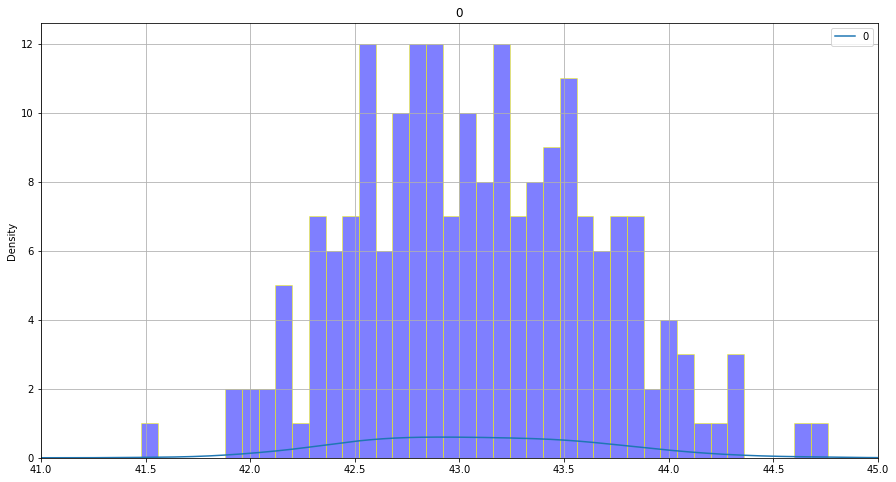

In [9]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
pd.DataFrame(data=point_estimates).plot(kind='density', xlim=(41, 45), ax=ax)
pd.DataFrame(data=point_estimates).hist(bins=50, range=(41, 45), color='b', edgecolor='yellow', alpha=0.5, ax=ax)
plt.show()

##### The samplig distribution appears to be roughly normal, despite the bimodal population distribution that the sample were drawn from. The more samples we take, the better our estimate of the population parameter is likely to be.

In [10]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

#### Confidence Intervals

##### A point estimate can give you a rough idea of a population parameter like the mean, but estimates are prone to error and taking multiple samples to get improved estimates may not be feasible. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, you'd set your confidence level to 95%. Higher confidence levels results in a wider confidence intervals.<br><br>Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.<br>If you know the standard deviation of the population, the margin of error is equal to:<br>

##### $$z*\frac{\sigma}{\sqrt{n}}$$

##### Where $\sigma$(sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value. The z-critical value is the number of standard deviation you'd have to go from the mean of the normal distribution to capture the proportion of the data assoicated with the desired confidence level. For instance, we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so we could use 2 as the z-critical value for a 95% confidence interval(although it is more exact to get z-critical values with stats.norm.ppf().).<br><br>Let's calculate a 95% confidence interval for our mean point estimate:

In [22]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a=population_ages, size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q=0.975)                         # Get the z_critical value

print("z_critical value :" + str(round(z_critical, 5)))      # Check the z_critical value

pop_stdev = population_ages.std()                            # Get the population standard deviation
margin_of_error = z_critical * pop_stdev / math.sqrt(sample_size)

confidence_interval = (round(sample_mean - margin_of_error, 3), round(sample_mean + margin_of_error, 3))

print(f"confidence interval : {confidence_interval}")

z_critical value :1.95996
confidence interval : (41.703, 43.343)
